<a href="https://colab.research.google.com/github/evangilbert10/portfolio/blob/main/Plotting_Hockey_Data_from_the_2021_Big_Data_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plotting Player Tracking Data from the 2021 Big Data Cup**

This analysis will included data from the [Stathletes 2021 Big Data Cup](https://www.stathletes.com/big-data-cup/). The dataset contains data for the 2018 Women’s Olympic Hockey Tournament and select Women's NCAA games.

For this analysis, I will be using the [hockey_rink](https://pypi.org/project/hockey-rink/) plotting library to plot the player tracking data in this dataset.


## **Dataset**

The dataset is comprised of Stathletes-tracked women’s hockey data from the Olympics and NCAA. The various event types include shots, plays, takeaways, puck recoveries, dump ins, dump outs, zone entries, faceoffs and penalties. For each event, expanded details are provided and the relevant skaters and teams involved are indicated when necessary.



## **Data Analysis**

### **Installation**

In [ ]:
pip install hockey_rink

### **Exploritory Data Analysis**

In [2]:
# Import required packages
import numpy as np
import pandas as pd
from hockey_rink import NHLRink, IIHFRink, NWHLRink
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in the 'csv' file and print the first five rows
data = pd.read_csv('https://raw.githubusercontent.com/bigdatacup/Big-Data-Cup-2021/main/hackathon_womens.csv')

print(data.head())

    game_date                 Home Team  ... X Coordinate 2  Y Coordinate 2
0  2018-02-11  Olympic (Women) - Canada  ...            NaN             NaN
1  2018-02-11  Olympic (Women) - Canada  ...            NaN             NaN
2  2018-02-11  Olympic (Women) - Canada  ...            NaN             NaN
3  2018-02-11  Olympic (Women) - Canada  ...            NaN             NaN
4  2018-02-11  Olympic (Women) - Canada  ...            NaN             NaN

[5 rows x 21 columns]


In [ ]:
# Check for missing values
print("Count of missing values in each column of the dataset:")
data.isna().sum()

Count of missing values in each column of the dataset:


game_date                0
Home Team                0
Away Team                0
Period                   0
Clock                    0
Home Team Skaters        0
Away Team Skaters        0
Home Team Goals          0
Away Team Goals          0
Team                     0
Player                   0
Event                    0
X Coordinate             0
Y Coordinate             0
Detail 1              7845
Detail 2             22331
Detail 3             22331
Detail 4             22331
Player 2             11202
X Coordinate 2       13897
Y Coordinate 2       13897
dtype: int64

In [ ]:
# Determine the number of observations in the dataset
data.shape

(24002, 21)

In [ ]:
# Check the automatically assigned data types
info = data.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24002 entries, 0 to 24001
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          24002 non-null  object 
 1   Home Team          24002 non-null  object 
 2   Away Team          24002 non-null  object 
 3   Period             24002 non-null  int64  
 4   Clock              24002 non-null  object 
 5   Home Team Skaters  24002 non-null  int64  
 6   Away Team Skaters  24002 non-null  int64  
 7   Home Team Goals    24002 non-null  int64  
 8   Away Team Goals    24002 non-null  int64  
 9   Team               24002 non-null  object 
 10  Player             24002 non-null  object 
 11  Event              24002 non-null  object 
 12  xC                 24002 non-null  int64  
 13  yC                 24002 non-null  int64  
 14  Detail1            16157 non-null  object 
 15  Detail2            1671 non-null   object 
 16  Detail3            167

In [ ]:
# Get the value counts for each Home Team in the dataset, sorted in descending order
data['Home Team'].value_counts().sort_values(ascending=False)

Olympic (Women) - United States                   7851
Olympic (Women) - Canada                          7222
Olympic (Women) - Finland                         3817
St. Lawrence Saints                               1803
Clarkson Golden Knights                           1678
Olympic (Women) - Olympic Athletes from Russia    1631
Name: Home Team, dtype: int64

In [ ]:
# Get the value counts for each Event in the dataset, sorted in descending order
data['Event'].value_counts().sort_values(ascending=False)

Play               7424
Puck Recovery      6960
Incomplete Play    2681
Zone Entry         1800
Dump In/Out        1682
Shot               1615
Takeaway            885
Faceoff Win         783
Penalty Taken       116
Goal                 56
Name: Event, dtype: int64

In [ ]:
# Get the value counts for Detail 1 in the dataset, sorted in descending order
data['Detail 1'].value_counts().sort_values(ascending=False)

Direct                     6817
Indirect                   3288
Lost                       1488
Carried                    1049
Wristshot                   779
Backhand                    640
Dumped                      589
Snapshot                    509
Slapshot                    227
Retained                    194
Played                      162
Forehand                    143
Deflection                   81
Fan                          56
Roughing                     30
Tripping                     24
Wrap Around                  19
Interference                 13
Cross-checking               11
Hooking                      10
Slashing                     10
Holding                       7
High-sticking                 3
Goalkeeper interference       3
Too many men on the ice       2
Boarding                      1
Delay of game                 1
Closing hand on puck          1
Name: Detail1, dtype: int64

In [ ]:
# Get the value counts for Detail 2 in the dataset, sorted in descending order
data['Detail 2'].value_counts().sort_values(ascending=False)

On Net     783
Missed     449
Blocked    439
Name: Detail 2, dtype: int64

In [ ]:
# Create a list of each game in the dataset
data.groupby(["game_date", "Home Team", "Away Team"])["game_date"].count()

game_date   Home Team                                       Away Team                                     
2018-02-11  Olympic (Women) - Canada                        Olympic (Women) - Olympic Athletes from Russia    1770
2018-02-13  Olympic (Women) - Canada                        Olympic (Women) - Finland                         1729
2018-02-14  Olympic (Women) - United States                 Olympic (Women) - Canada                          1849
2018-02-19  Olympic (Women) - Olympic Athletes from Russia  Olympic (Women) - Canada                          1631
2018-02-21  Olympic (Women) - United States                 Olympic (Women) - Canada                          2365
2018-10-19  St. Lawrence Saints                             Clarkson Golden Knights                           1803
2018-10-20  Clarkson Golden Knights                         St. Lawrence Saints                               1678
2019-02-12  Olympic (Women) - Canada                        Olympic (Women) - United Sta

### **Data Cleaning**

In [4]:
# Rename X and Y Coordinate columns
data = data.rename(columns={'X Coordinate': 'xC', 'Y Coordinate': 'yC', 'X Coordinate 2': 'xC2', 'Y Coordinate 2': 'yC2', 'Detail 1': 'Detail1', 'Detail 2': 'Detail2', 'Detail 3': 'Detail3', 'Detail 4': 'Detail4'})

In [5]:
# Subset Women's NCAA data
ncaa = data[data['Home Team'].isin(['St. Lawrence Saints', 'Clarkson Golden Knights'])]

In [6]:
# Subset Women's Olympic Tournament data
olympic = data[data['Home Team'].isin(['Olympic (Women) - Olympic Athletes from Russia', 'Olympic (Women) - Finland', 'Olympic (Women) - Canada', 'Olympic (Women) - United States'])]

In [26]:
data["goal"] = (data.Event == "Goal").astype(int)

### **Data Visualization**

### **NCAA**

**St. Lawrence Saints vs. Clarkson Golden Knights: 2018-10-19**

[4-3 Final (OT)](https://clarksonathletics.com/news/2018/10/19/womens-hockey-clarkson-falls-in-ot-at-st-lawrence.aspx)

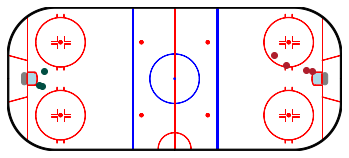

In [45]:
# Create a scatterplot of each team's goals
game_1 = ncaa.loc[(data["Home Team"] == "St. Lawrence Saints") & (ncaa["Away Team"] == "Clarkson Golden Knights") & (ncaa["game_date"] == "2018-10-19")]
knights_goals = game_1.loc[(game_1.Team == "Clarkson Golden Knights") & (game_1.Event == "Goal")]
saints_goals = game_1.loc[(game_1.Team == "St. Lawrence Saints") & (game_1.Event == "Goal")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(saints_goals["xC"], saints_goals["yC"], color="#af1e2c")
rink.scatter(200 - knights_goals["xC"], 85 - knights_goals["yC"], color="#004e42") 

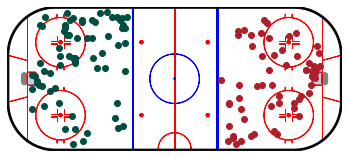

In [46]:
# Create a scatterplot of each team's shots
shots = game_1.loc[(game_1.Event.isin(["Shot", "Goal"]))]
saints_shots = shots[shots.Team == "St. Lawrence Saints"]
knights_shots = shots[shots.Team == "Clarkson Golden Knights"]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(saints_shots["xC"], saints_shots["yC"], color="#af1e2c")
rink.scatter(200 - knights_shots["xC"], 85 - knights_shots["yC"], color="#004e42")

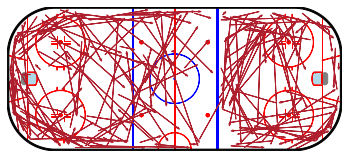

In [28]:
# Plotting passes for the St. Lawrence Saints
saints_passes = game_1.loc[(game_1.Team == "St. Lawrence Saints") & (game_1.Event == "Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(saints_passes["xC"], saints_passes["yC"], 
                    saints_passes["xC2"], saints_passes["yC2"], color="#af1e2c")  

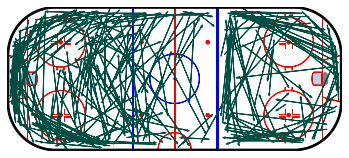

In [18]:
# Plotting passes for the Clarkson Golden Knights
knights_passes = game_1.loc[(game_1.Team == "Clarkson Golden Knights") & (game_1.Event == "Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(knights_passes["xC"], knights_passes["yC"], 
                    knights_passes["xC2"], knights_passes["yC2"], color="#004e42") 

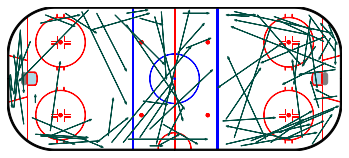

In [31]:
# Plotting incomplete passes for the Clarkson Golden Knights
knights_inc_passes = game_1.loc[(game_1.Team == "Clarkson Golden Knights") & (game_1.Event == "Incomplete Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(knights_inc_passes["xC"], knights_inc_passes["yC"], 
                    knights_inc_passes["xC2"], knights_inc_passes["yC2"], color="#004e42") 

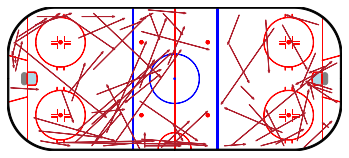

In [33]:
# Plotting incomplete passes for the St. Lawrence Saints
saints_passes = game_1.loc[(game_1.Team == "St. Lawrence Saints") & (game_1.Event == "Incomplete Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(saints_passes["xC"], saints_passes["yC"], 
                    saints_passes["xC2"], saints_passes["yC2"], color="#af1e2c")  

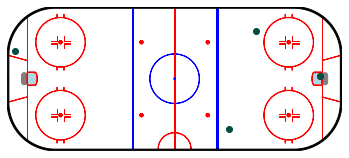

In [38]:
# Create a scatterplot of each team's penalties
knights_penalties = game_1.loc[(game_1.Team == "Clarkson Golden Knights") & (game_1.Event == "Penalty Taken")]
saints_penalties = game_1.loc[(game_1.Team == "St. Lawrence Saints") & (game_1.Event == "Penalty Taken")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(saints_penalties["xC"], saints_penalties["yC"], color="#af1e2c")
rink.scatter(200 - knights_penalties["xC"], 85 - knights_penalties["yC"], color="#004e42") 

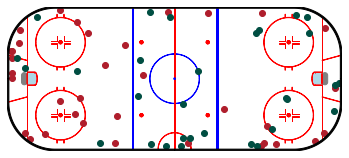

In [43]:
# Create a scatterplot of each team's takeaways
knights_takeaways = game_1.loc[(game_1.Team == "Clarkson Golden Knights") & (game_1.Event == "Takeaway")]
saints_takeaways = game_1.loc[(game_1.Team == "St. Lawrence Saints") & (game_1.Event == "Takeaway")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(saints_takeaways["xC"], saints_takeaways["yC"], color="#af1e2c")
rink.scatter(200 - knights_takeaways["xC"], 85 - knights_takeaways["yC"], color="#004e42") 

**Clarkson Golden Knights vs. St. Lawrence Saints: 2018-10-20**

[4-0 Final](https://clarksonathletics.com/news/2018/10/20/womens-hockey-gabel-sets-goal-record-in-4-0-win-over-st-lawrence.aspx)

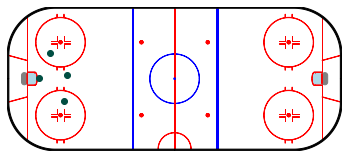

In [44]:
# Create a scatterplot of each team's goals
game_2 = ncaa.loc[(data["Home Team"] == "Clarkson Golden Knights") & (ncaa["Away Team"] == "St. Lawrence Saints") & (ncaa["game_date"] == "2018-10-20")]
knights_goals = game_2.loc[(game_2.Team == "Clarkson Golden Knights") & (game_2.Event == "Goal")]
saints_goals = game_2.loc[(game_2.Team == "St. Lawrence Saints") & (game_2.Event == "Goal")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(saints_goals["xC"], saints_goals["yC"], color="#af1e2c")
rink.scatter(200 - knights_goals["xC"], 85 - knights_goals["yC"], color="#004e42") 

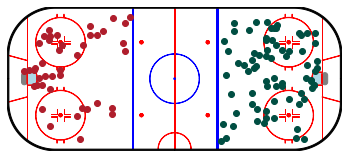

In [40]:
# Create a scatterplot of each team's shots
shots = game_2.loc[(game_2.Event.isin(["Shot", "Goal"]))]
knights_shots = shots[shots.Team == "Clarkson Golden Knights"]
saints_shots = shots[shots.Team == "St. Lawrence Saints"]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(knights_shots["xC"], knights_shots["yC"], color="#004e42")
rink.scatter(200 - saints_shots["xC"], 85 - saints_shots["yC"], color="#af1e2c")

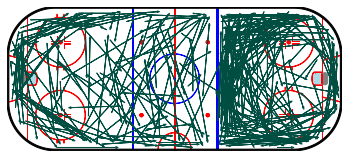

In [20]:
# Plotting passes for the Clarkson Golden Knights
knights_passes = game_2.loc[(game_2.Team == "Clarkson Golden Knights") & (game_2.Event == "Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(knights_passes["xC"], knights_passes["yC"], 
                    knights_passes["xC2"], knights_passes["yC2"], color="#004e42") 

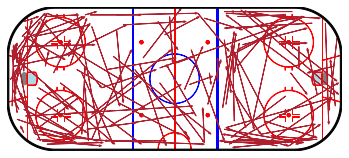

In [21]:
# Plotting passes for the St. Lawrence Saints
saints_passes = game_2.loc[(game_2.Team == "St. Lawrence Saints") & (game_2.Event == "Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(saints_passes["xC"], saints_passes["yC"], 
                    saints_passes["xC2"], saints_passes["yC2"], color="#af1e2c")  

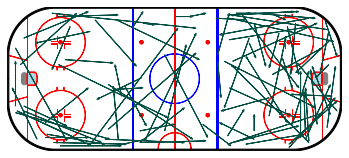

In [23]:
# Plotting incomplete passes for the Clarkson Golden Knights
knights_inc_passes = game_2.loc[(game_2.Team == "Clarkson Golden Knights") & (game_2.Event == "Incomplete Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(knights_inc_passes["xC"], knights_inc_passes["yC"], 
                    knights_inc_passes["xC2"], knights_inc_passes["yC2"], color="#004e42") 

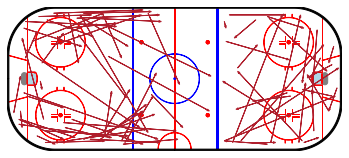

In [24]:
# Plotting incomplete passes for the St. Lawrence Saints
saints_inc_passes = game_2.loc[(game_2.Team == "St. Lawrence Saints") & (game_2.Event == "Incomplete Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(saints_inc_passes["xC"], saints_inc_passes["yC"], 
                    saints_inc_passes["xC2"], saints_inc_passes["yC2"], color="#af1e2c")  

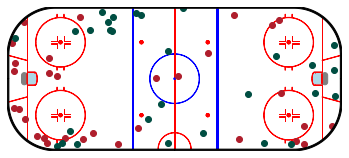

In [42]:
# Create a scatterplot of each team's takeaways
knights_takeaways = game_2.loc[(game_2.Team == "Clarkson Golden Knights") & (game_2.Event == "Takeaway")]
saints_takeaways = game_2.loc[(game_2.Team == "St. Lawrence Saints") & (game_2.Event == "Takeaway")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(saints_takeaways["xC"], saints_takeaways["yC"], color="#af1e2c")
rink.scatter(200 - knights_takeaways["xC"], 85 - knights_takeaways["yC"], color="#004e42") 

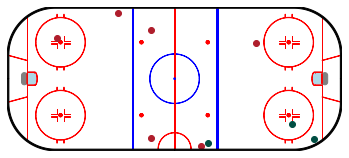

In [39]:
# Create a scatterplot of each team's penalties
knights_penalties = game_2.loc[(game_2.Team == "Clarkson Golden Knights") & (game_2.Event == "Penalty Taken")]
saints_penalties = game_2.loc[(game_2.Team == "St. Lawrence Saints") & (game_2.Event == "Penalty Taken")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(saints_penalties["xC"], saints_penalties["yC"], color="#af1e2c")
rink.scatter(200 - knights_penalties["xC"], 85 - knights_penalties["yC"], color="#004e42") 

### **2018 Women's Olympic Tournament**

**United States vs. Canada: 2018-02-21 (Gold Medal Game)**

[3-2 Final](http://reports.iihf.hockey/Hydra/436/IHW400101_74_5_0.pdf)

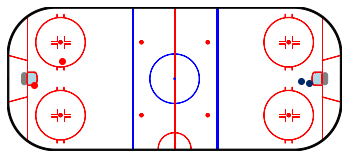

In [48]:
# Create a scatterplot of each team's goals
game_data = olympic.loc[(olympic["Home Team"] == "Olympic (Women) - United States") & (olympic["Away Team"] == "Olympic (Women) - Canada") & (olympic["game_date"] == "2018-02-21")]
usa_goals = game_data.loc[(game_data.Team == "Olympic (Women) - United States") & (game_data.Event == "Goal")]
canada_goals = game_data.loc[(game_data.Team == "Olympic (Women) - Canada") & (game_data.Event == "Goal")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(usa_goals["xC"], usa_goals["yC"], color="#002868")
rink.scatter(200 - canada_goals["xC"], 85 - canada_goals["yC"], color="#FF0000") 

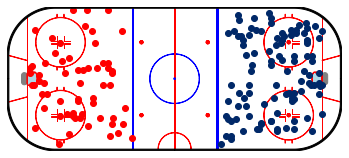

In [49]:
# Create a scatterplot of each team's shots
shots = game_data.loc[(game_data.Event.isin(["Shot", "Goal"]))]
usa_shots = shots[shots.Team == "Olympic (Women) - United States"]
canada_shots = shots[shots.Team == "Olympic (Women) - Canada"]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(usa_shots["xC"], usa_shots["yC"], color="#002868")
rink.scatter(200 - canada_shots["xC"], 85 - canada_shots["yC"], color="#FF0000")

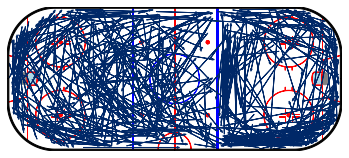

In [52]:
# Plotting passes for the United States
usa_passes = game_data.loc[(game_data.Team == "Olympic (Women) - United States") & (game_data.Event == "Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(usa_passes["xC"], usa_passes["yC"], 
                    usa_passes["xC2"], usa_passes["yC2"], color="#002868") 

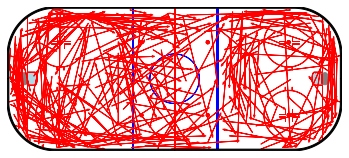

In [53]:
# Plotting passes for Canada
canada_passes = game_data.loc[(game_data.Team == "Olympic (Women) - Canada") & (game_data.Event == "Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(canada_passes["xC"], canada_passes["yC"], 
                    canada_passes["xC2"], canada_passes["yC2"], color="#FF0000") 

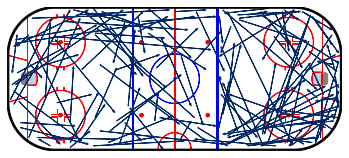

In [55]:
# Plotting incomplete passes for the United States
usa_incomplete_passes = game_data.loc[(game_data.Team == "Olympic (Women) - United States") & (game_data.Event == "Incomplete Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(usa_incomplete_passes["xC"], usa_incomplete_passes["yC"], 
                    usa_incomplete_passes["xC2"], usa_incomplete_passes["yC2"], color="#002868") 

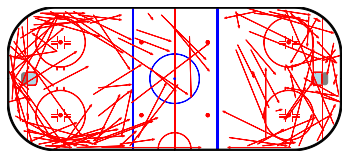

In [54]:
# Plotting incomplete passes for Canada
canada_incomplete_passes = game_data.loc[(game_data.Team == "Olympic (Women) - Canada") & (game_data.Event == "Incomplete Play")]
ax.clear()
rink.draw()
arrows = rink.arrow(canada_incomplete_passes["xC"], canada_incomplete_passes["yC"], 
                    canada_incomplete_passes["xC2"], canada_incomplete_passes["yC2"], color="#FF0000") 

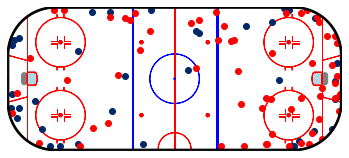

In [56]:
# Create a scatterplot of each team's takeaways
usa_takeaways = game_data.loc[(game_data.Team == "Olympic (Women) - United States") & (game_data.Event == "Takeaway")]
canada_takeaways = game_data.loc[(game_data.Team == "Olympic (Women) - Canada") & (game_data.Event == "Takeaway")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(usa_takeaways["xC"], usa_takeaways["yC"], color="#002868")
rink.scatter(200 - canada_takeaways["xC"], 85 - canada_takeaways["yC"], color="#FF0000") 

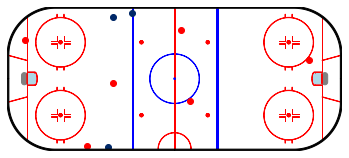

In [57]:
# Create a scatterplot of each team's penalties
usa_penalties = game_data.loc[(game_data.Team == "Olympic (Women) - United States") & (game_data.Event == "Penalty Taken")]
canada_penalties = game_data.loc[(game_data.Team == "Olympic (Women) - Canada") & (game_data.Event == "Penalty Taken")]
rink = NHLRink(x_shift=100, y_shift=42.5)
ax = rink.draw()
rink.scatter(usa_penalties["xC"], usa_penalties["yC"], color="#002868")
rink.scatter(200 - canada_penalties["xC"], 85 - canada_penalties["yC"], color="#FF0000") 